# Jupyter Data Science Workflow

## From exploratory analysis to reproducible science
This notebook works through a series of videos by <i>Jake VanderPlas</i> of <i>University of Washington eScience Institute</i>. The original page for this can be found here: https://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/.

## Loading and Visualising Data

In [1]:
import pandas as pd
import os
from urllib.request import urlretrieve
%matplotlib inline

In [2]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    #legend is a bit verbose so we can rename the columns
    data.columns = ['Total', 'East', 'West']
    
    return data

In [3]:
#we don't need to download this every time we run the notebook
data = get_fremont_data()

In [4]:
#we can get the data into a dataframe
#we convert the dates from strings into a date format we can work with

data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


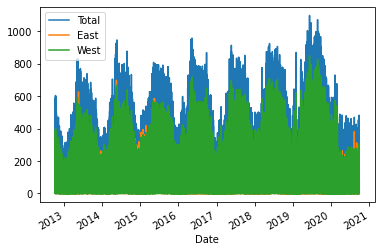

In [5]:
data.plot();

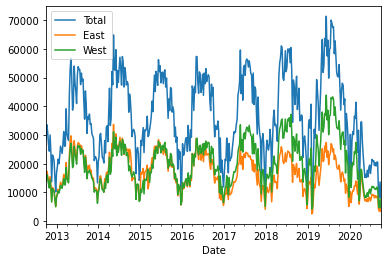

In [6]:
#above there are too many data points so we can do a weekly resample
data.resample('W').sum().plot();

## Further Data Exploration

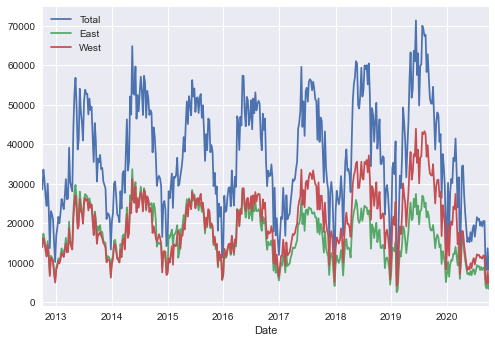

In [7]:
import matplotlib.pyplot as plt
#Jake (& many others) prefer searborn style to generic matplotlib style
plt.style.use('seaborn')

data.resample('W').sum().plot();

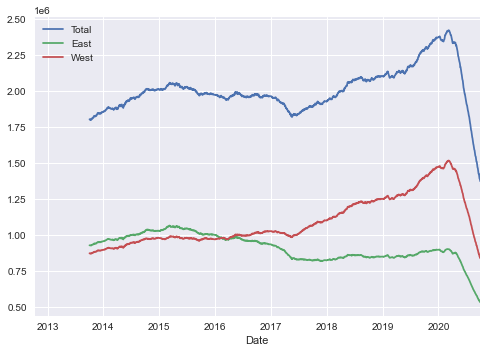

In [8]:
#Is there an annual trend?
#Now we are looking at a 365 day moving average
data.resample('D').sum().rolling(365).sum().plot();
#Here we can see two interesting things
# From 2017 the number of West sidewalk journeys was increasing dramatically but the East sidewalk journeys were fairly flat.
# a huge drop-off in bike use over the Fremont bridge in Seattle starting in early 2020 due to covid-19

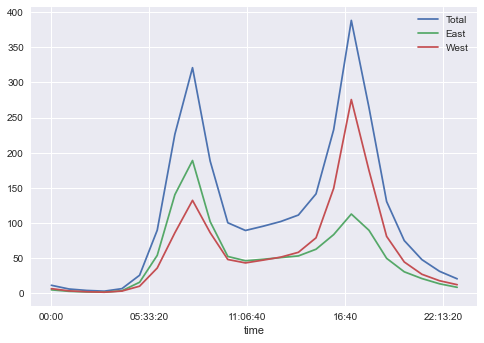

In [9]:
#We can also look at the trend within individual days at each time of day
data.groupby(data.index.time).mean().plot();
#We see the East side peaks in the morning and the West side peaks in the afternoon indicative of a commute pattern

In [10]:
#It would be nice to see the whole dataset in this way
#We can do that with a pivot table
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
#if we look at the first 5 rows and columns we can see that each column corresponds to a date and each row to an hour within that day
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


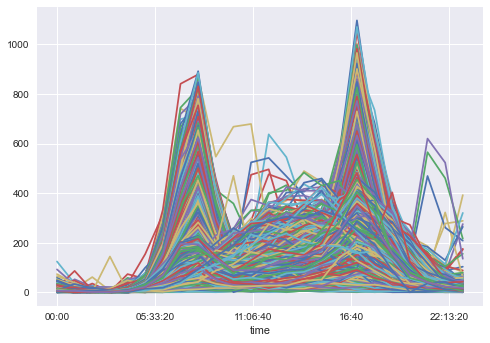

In [11]:
#Now we have a line for each day over the 7+ years of data
pivoted.plot(legend=False);

it is a little hard to see what is happening so we will adjust the alpha to make them mostly transparent

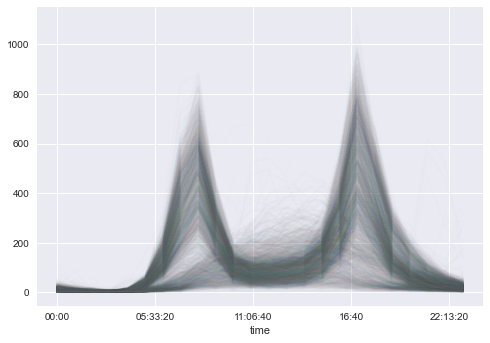

In [12]:
pivoted.plot(legend=False, alpha=0.01);

* We can see that there are a lot of dates with a bimodal commute pattern
* We can also see that there are a bunch of dates that don't have that pattern but increase later in the morning and peak around midday
* The best hypothesis is that the bimodal distribution is weekdays and the other days are weekends and holidays (we will look at this further later)

## Version Control with Git and GitHub

Because when we work on a notebook we can do it in a very nonlinear way, it is important to restart and run all to make sure the notebook runs in a linear way. It looks like our analysis is working so far. Now we want to save this work so that no matter what happens we can recover it.

We can do this via the git version control system in particular github.

OK we now have a github repository...


## Working with Data and GitHub
Data can sometimes be difficult to work with in GitHub. In this case we should be ok because our data isn't too large. We've readjusted some things, particularly making it so that we don't need to download the data every time but only if we specifically request it, or, it doesn't exist locally. We commit these changes to GitHub.